___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### *ii. Load Dataset*

In [2]:
df_org = pd.read_csv("treetypes.csv")
df = df_org.copy()

In [3]:
df.columns = df.columns.str.lower()

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
df.head()

elevation  aspect  slope  horizontal_distance_to_hydrology  \
0       2696     123     10                               212   
1       3269     110     19                               134   
2       3283     322     18                               346   
3       2847      89     31                               270   
4       3248      93     12                               507   

   vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
0                              48                             2245   
1                              40                             3734   
2                             104                             4369   
3                             175                             1320   
4                             118                              570   

   hillshade_9am  hillshade_noon  hillshade_3pm  \
0            237             231            123   
1            249             216             88   
2            170             217            185   
3            248             173             29   
4            239             221            110   

   horizontal_distance_to_fire_points  ...  soil_type_32  soil_type_33  \
0                                2113  ...             0             0   
1                                3960  ...             0             0   
2                                1330  ...             0             0   
3                                 889  ...             0             0   
4                                 945  ...             0             0   

   soil_type_34  soil_type_35  soil_type_36  soil_type_37  soil_type_38  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             1   
3             0             0             0             0             0   
4             0             0             0             0             0   

   soil_type_39  soil_type_40  cover_type  
0             0             0           6  
1             0             0           1  
2             0             0           7  
3             0             0           5  
4             0             0           7  

[5 rows x 55 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   elevation                           250000 non-null  int64
 1   aspect                              250000 non-null  int64
 2   slope                               250000 non-null  int64
 3   horizontal_distance_to_hydrology    250000 non-null  int64
 4   vertical_distance_to_hydrology      250000 non-null  int64
 5   horizontal_distance_to_roadways     250000 non-null  int64
 6   hillshade_9am                       250000 non-null  int64
 7   hillshade_noon                      250000 non-null  int64
 8   hillshade_3pm                       250000 non-null  int64
 9   horizontal_distance_to_fire_points  250000 non-null  int64
 10  wilderness_area_1                   250000 non-null  int64
 11  wilderness_area_2                   250000 non-null 

In [6]:
df.iloc[:,10:14].sum().sum()

249544

In [7]:
df.iloc[:,14:54].sum().sum()

226937

**In the data Wilderness_Area and Soil_Type columns are created by getdummies method. In the analysis, another dataframe will be created that Wilderness_Area and Soil_Type composed as an ordinal coding. These columns also have missing values.**

In [8]:
df_ord = df.iloc[:,:10]

**Wilderness_Area**

In [9]:
df_ord["wilderness_area"] = df.iloc[:,10] + 2 * df.iloc[:,11] + 3 * df.iloc[:,12] + 4 * df.iloc[:,13]

In [10]:
df_ord["wilderness_area"].value_counts()

3    104456
4     77173
1     59575
2      8340
0       456
Name: wilderness_area, dtype: int64

In [11]:
df.iloc[:,10:14].sum()

wilderness_area_1     59575
wilderness_area_2      8340
wilderness_area_3    104456
wilderness_area_4     77173
dtype: int64

In [12]:
df_ord["wilderness_area"] = df_ord["wilderness_area"].replace(0,np.nan)

In [13]:
df_ord["wilderness_area"].value_counts(dropna=False)

3.000    104456
4.000     77173
1.000     59575
2.000      8340
nan         456
Name: wilderness_area, dtype: int64

Wilderness Area column was created. There are 456 null values in Wilderness Area column.

**Soil Type**

In [14]:
df_ord["soil_type"] = df.iloc[:, 14]
for i in range(15,54):
    df_ord["soil_type"] += (i-13) * df.iloc[:,i]

In [15]:
df_ord["soil_type"].value_counts().values[2:] - df.iloc[:,14:54].sum().sort_values(ascending=False).values[1:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
df_ord["soil_type"] = df_ord["soil_type"].replace(0,np.nan)

In [17]:
df_ord["soil_type"].isnull().sum()

23063

Soil Type column was created. There are 23063 null values in Solid_Type column.

In [18]:
# Add the target column cover_type 

df_ord = pd.concat([df_ord,df.iloc[:,54]], axis=1)

In [19]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   elevation                           250000 non-null  int64  
 1   aspect                              250000 non-null  int64  
 2   slope                               250000 non-null  int64  
 3   horizontal_distance_to_hydrology    250000 non-null  int64  
 4   vertical_distance_to_hydrology      250000 non-null  int64  
 5   horizontal_distance_to_roadways     250000 non-null  int64  
 6   hillshade_9am                       250000 non-null  int64  
 7   hillshade_noon                      250000 non-null  int64  
 8   hillshade_3pm                       250000 non-null  int64  
 9   horizontal_distance_to_fire_points  250000 non-null  int64  
 10  wilderness_area                     249544 non-null  float64
 11  soil_type                 

In [20]:
df_ord.describe().T

count     mean      std      min  \
elevation                          250000.000 2748.505  418.301 1859.000   
aspect                             250000.000  156.212  109.653    0.000   
slope                              250000.000   16.331    8.317    0.000   
horizontal_distance_to_hydrology   250000.000  228.094  209.630    0.000   
vertical_distance_to_hydrology     250000.000   50.898   61.007 -163.000   
horizontal_distance_to_roadways    250000.000 1719.967 1330.818    0.000   
hillshade_9am                      250000.000  212.370   30.655    0.000   
hillshade_noon                     250000.000  218.511   22.681    0.000   
hillshade_3pm                      250000.000  134.503   46.034    0.000   
horizontal_distance_to_fire_points 250000.000 1521.757 1107.378    0.000   
wilderness_area                    249544.000    2.798    1.121    1.000   
soil_type                          226937.000   19.637   12.631    1.000   
cover_type                         250000.000    4.000    2.001    1.000   

                                        25%      50%      75%      max  
elevation                          2375.000 2753.000 3108.000 3857.000  
aspect                               65.000  125.000  260.000  360.000  
slope                                10.000   15.000   22.000   65.000  
horizontal_distance_to_hydrology     66.000  180.000  330.000 1390.000  
vertical_distance_to_hydrology        5.000   32.000   79.000  598.000  
horizontal_distance_to_roadways     756.000 1318.000 2294.000 7112.000  
hillshade_9am                       195.000  220.000  235.000  254.000  
hillshade_noon                      206.000  222.000  235.000  254.000  
hillshade_3pm                       106.000  137.000  167.000  252.000  
horizontal_distance_to_fire_points  734.000 1273.000 1998.000 7150.000  
wilderness_area                       2.000    3.000    4.000    4.000  
soil_type                            10.000   20.000   30.000   40.000  
cover_type                            2.000    4.000    6.000    7.000

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [21]:
df_ord.isnull().sum()

elevation                                 0
aspect                                    0
slope                                     0
horizontal_distance_to_hydrology          0
vertical_distance_to_hydrology            0
horizontal_distance_to_roadways           0
hillshade_9am                             0
hillshade_noon                            0
hillshade_3pm                             0
horizontal_distance_to_fire_points        0
wilderness_area                         456
soil_type                             23063
cover_type                                0
dtype: int64

There are missing values only in the columns wilderness_area and soil_type.

In [22]:
df_ord.corr()["wilderness_area"].sort_values()

elevation                            -0.618
soil_type                            -0.577
horizontal_distance_to_fire_points   -0.510
horizontal_distance_to_roadways      -0.462
hillshade_9am                        -0.196
horizontal_distance_to_hydrology     -0.106
hillshade_noon                       -0.095
hillshade_3pm                         0.061
vertical_distance_to_hydrology        0.102
aspect                                0.138
cover_type                            0.209
slope                                 0.255
wilderness_area                       1.000
Name: wilderness_area, dtype: float64

The most influential columns on wilderness_area are elevation, soil_type and horizontal_distance_to_fire_points. Since there are null values in soil type column, wilderness area column was filled according to the columns elevation and horizontal_distance_to_fire_points.

For continuous columns to create groups, qcut fuction was used. Then null valeus were filled according to these columns.

In [23]:
def two_cont_group_control(group1,group2,groupfill,df,qct):
    
    m_qcut_1 = df[[group1]]
    df["m_qcut_1"] = pd.qcut(m_qcut_1[group1], q = qct, duplicates='drop')
    
    m_qcut_2 = df[[group2]]
    df["m_qcut_2"] = pd.qcut(m_qcut_2[group2], q = qct, duplicates='drop')
    
    try:
        return df.groupby(["m_qcut_1","m_qcut_2" ])[groupfill].value_counts(dropna=False)
    finally:
        df.drop(["m_qcut_1","m_qcut_2"], axis=1, inplace=True)

In [24]:
two_cont_group_control("elevation","horizontal_distance_to_fire_points","wilderness_area",df_ord,30)[150:200]

m_qcut_1          m_qcut_2          wilderness_area
(2319.0, 2355.0]  (766.0, 828.0]    4.000              451
                                    3.000               18
                                    NaN                  4
                  (828.0, 891.0]    4.000              427
                                    3.000               22
                  (891.0, 957.0]    4.000              478
                                    3.000                5
                  (957.0, 1026.0]   4.000              511
                                    3.000               13
                  (1026.0, 1108.0]  4.000              421
                                    3.000                8
                                    NaN                  1
                  (1108.0, 1191.0]  4.000              206
                                    3.000               20
                  (1191.0, 1273.0]  4.000              224
                                    NaN                  1
    

In [25]:
def group_fill(group1,group2,groupfill,df,typ="two_cat", qct=15):
    if typ == "two_cont":
        m_qcut_1 = df[[group1]]
        df["m_qcut_1"] = pd.qcut(m_qcut_1[group1], q = qct, duplicates='drop')

        m_qcut_2 = df[[group2]]
        df["m_qcut_2"] = pd.qcut(m_qcut_2[group2], q = qct, duplicates='drop')

        mode_group_1 = df.groupby(["m_qcut_1","m_qcut_2" ])[groupfill].\
                                transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
        df[groupfill].fillna(mode_group_1, inplace=True)

        mode_group_2 = df_ord.groupby(["m_qcut_1"])[groupfill].\
                                transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
        df[groupfill].fillna(mode_group_2, inplace=True)

        df.drop(["m_qcut_1","m_qcut_2"], axis=1, inplace=True)
    if typ == "one_cont":
        m_qcut_1 = df[[group1]]
        df["m_qcut_1"] = pd.qcut(m_qcut_1[group1], q = qct, duplicates='drop')

        mode_group_1 = df.groupby(["m_qcut_1",group2])[groupfill].\
                                transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
        df[groupfill].fillna(mode_group_1, inplace=True)

        mode_group_2 = df_ord.groupby(["m_qcut_1"])[groupfill].\
                                transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
        df[groupfill].fillna(mode_group_2, inplace=True)

        df.drop(["m_qcut_1"], axis=1, inplace=True)
    if typ == "two_cat":
        
        mode_group_1 = df.groupby([group1,group2])[groupfill].\
                                transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
        df[groupfill].fillna(mode_group_1, inplace=True)

        mode_group_2 = df_ord.groupby([group1])[groupfill].\
                                transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
        df[groupfill].fillna(mode_group_2, inplace=True)

wilderness_area columns was filled.

In [26]:
group_fill("elevation","horizontal_distance_to_fire_points","wilderness_area",df_ord,typ="two_cont", qct=30)

In [27]:
df_ord["wilderness_area"].isnull().sum()

0

In [28]:
df_ord.corr()["soil_type"].sort_values()

wilderness_area                      -0.577
slope                                -0.262
aspect                               -0.026
vertical_distance_to_hydrology        0.030
hillshade_9am                         0.047
hillshade_3pm                         0.054
cover_type                            0.072
hillshade_noon                        0.074
horizontal_distance_to_hydrology      0.264
horizontal_distance_to_fire_points    0.353
horizontal_distance_to_roadways       0.460
elevation                             0.827
soil_type                             1.000
Name: soil_type, dtype: float64

In [29]:
group_fill("elevation","wilderness_area","soil_type",df_ord,typ="one_cont", qct=30)

soil_type column was filled.

In [30]:
df_ord.isnull().sum()

elevation                             0
aspect                                0
slope                                 0
horizontal_distance_to_hydrology      0
vertical_distance_to_hydrology        0
horizontal_distance_to_roadways       0
hillshade_9am                         0
hillshade_noon                        0
hillshade_3pm                         0
horizontal_distance_to_fire_points    0
wilderness_area                       0
soil_type                             0
cover_type                            0
dtype: int64

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

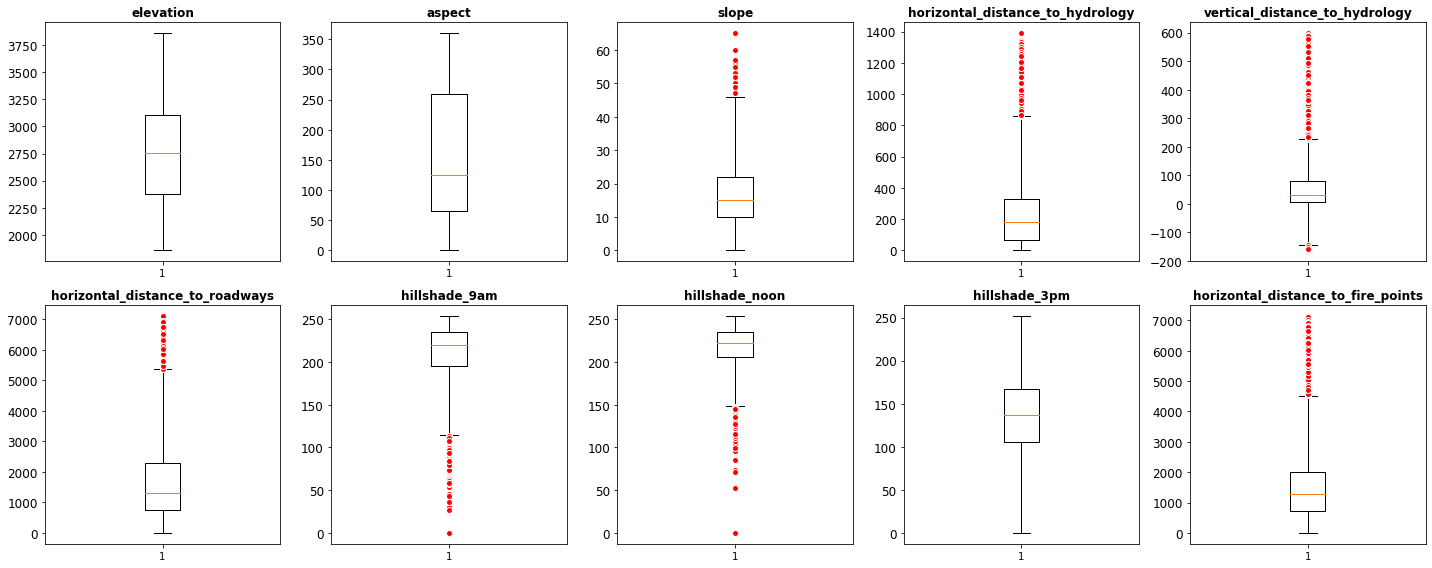

In [31]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(2,5, figsize=(20,8))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_ord.iloc[:,i], flierprops=red_circle, whis=2)
    ax.set_title(df_ord.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

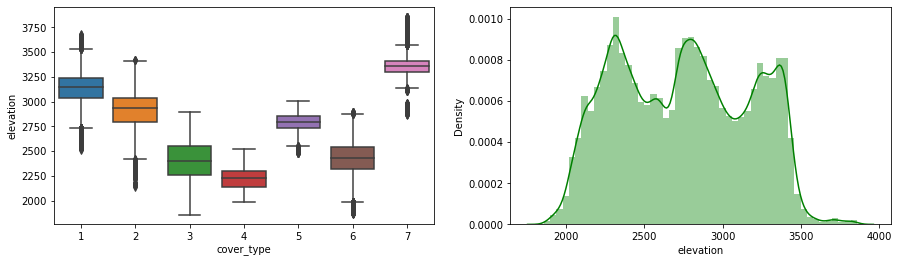

In [32]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
ax=axs.flat
sns.boxplot(y=df_ord["elevation"], x=df_ord["cover_type"], ax=ax[0])
sns.distplot(df_ord["elevation"],ax=ax[1], color="green");

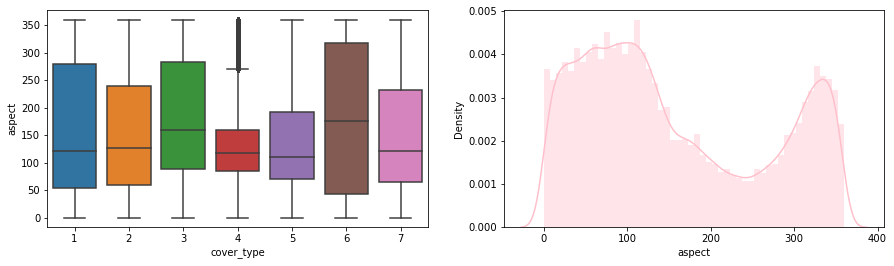

In [33]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
ax=axs.flat
sns.boxplot(y=df_ord["aspect"], x=df_ord["cover_type"], ax=ax[0])
sns.distplot(df_ord["aspect"],ax=ax[1], color="pink");

In [34]:
df_ord[(df_ord["cover_type"] == 4) & (df["aspect"]>280)]

elevation  aspect  slope  horizontal_distance_to_hydrology  \
227          2076     312     12                                 0   
243          2128     336     28                                30   
272          2199     308      9                                 0   
281          2322     341     13                                56   
379          2065     307     16                                 0   
...           ...     ...    ...                               ...   
249314       2145     335     17                                 0   
249336       2157     347      8                                 0   
249483       2372     313     15                               213   
249548       2123     354     14                                 2   
249603       2042     287     10                                33   

        vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
227                                  0                             1330   
243                                 18                             1199   
272                                  0                              698   
281                                 19                             1186   
379                                  0                              518   
...                                ...                              ...   
249314                               0                              782   
249336                               0                             1101   
249483                              78                             1057   
249548                               0                             1254   
249603                               0                              709   

        hillshade_9am  hillshade_noon  hillshade_3pm  \
227               186             231            184   
243               145             188            174   
272               194             233            179   
281               189             217            166   
379               173             228            194   
...               ...             ...            ...   
249314            179             215            172   
249336            200             228            165   
249483            177             226            188   
249548            193             212            155   
249603            189             238            187   

        horizontal_distance_to_fire_points  wilderness_area  soil_type  \
227                                    643            4.000     17.000   
243                                   1139            4.000     17.000   
272                                   1636            4.000      3.000   
281                                    197            4.000     10.000   
379                                    209            4.000      1.000   
...                                    ...              ...        ...   
249314                                1563            4.000     10.000   
249336                                 797            4.000     17.000   
249483                                 692            4.000      6.000   
249548                                 475            4.000     14.000   
249603                                 678            4.000     17.000   

        cover_type  
227              4  
243              4  
272              4  
281              4  
379              4  
...            ...  
249314           4  
249336           4  
249483           4  
249548           4  
249603           4  

[4206 rows x 13 columns]

### Deal with Outliers

#### *ii. Drop Outliers*

**some outliers of slope column were dropped.**

In [35]:
df_ord = df_ord[~(df_ord["slope"] >50)]

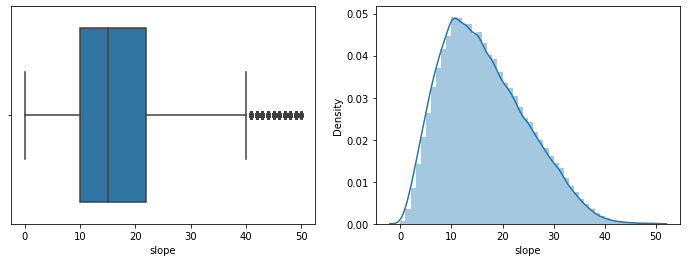

In [36]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
ax=axs.flat
sns.boxplot(df_ord["slope"], ax=ax[0])
sns.distplot(df_ord["slope"], ax=ax[1]);

**some outliers of horizontal_distance_to_hydrology column were dropped**

In [37]:
df_ord = df_ord[~(df_ord["horizontal_distance_to_hydrology"]>1000)]

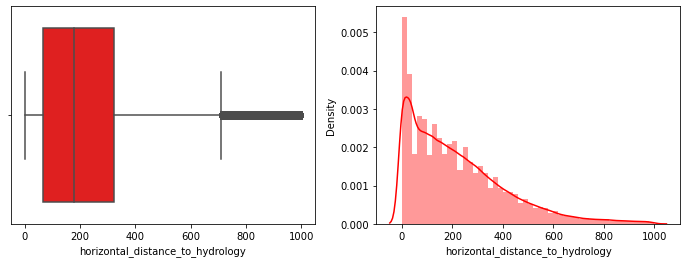

In [38]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
ax=axs.flat
sns.boxplot(df_ord["horizontal_distance_to_hydrology"], ax=ax[0], color="red")
sns.distplot(df_ord["horizontal_distance_to_hydrology"], ax=ax[1], color="red");

**some outliers of vertical_distance_to_hydrology column were dropped**

In [39]:
df_ord = df_ord[~((df_ord["vertical_distance_to_hydrology"]>300) | (df_ord["vertical_distance_to_hydrology"]<-120))]

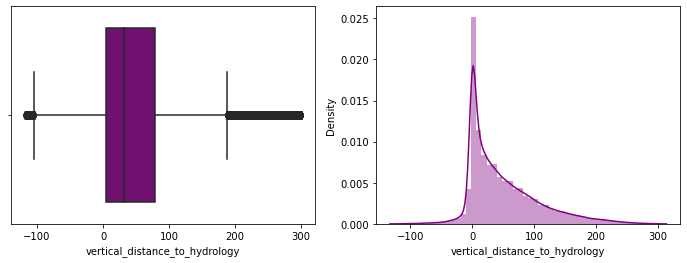

In [40]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
ax=axs.flat
sns.boxplot(df_ord["vertical_distance_to_hydrology"], ax=ax[0], color="purple")
sns.distplot(df_ord["vertical_distance_to_hydrology"], ax=ax[1], color="purple");

**some outliers of horizantal_distance_to_roadways column were dropped**

In [41]:
df_ord = df_ord[~(df_ord["horizontal_distance_to_roadways"]>6500)]

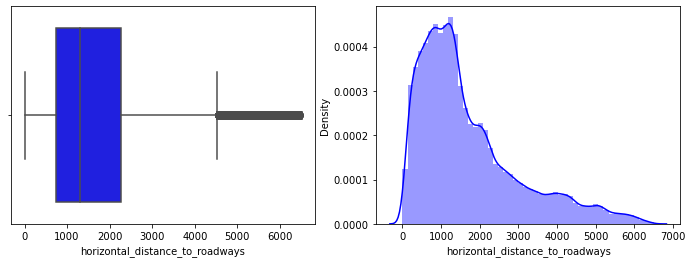

In [42]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
ax=axs.flat
sns.boxplot(df_ord["horizontal_distance_to_roadways"], ax=ax[0], color="blue")
sns.distplot(df_ord["horizontal_distance_to_roadways"],bins=50, ax=ax[1], color="blue");

**some outliers of hillshade_9am column were dropped**

In [43]:
df_ord = df_ord[~(df_ord["hillshade_9am"]<100)]

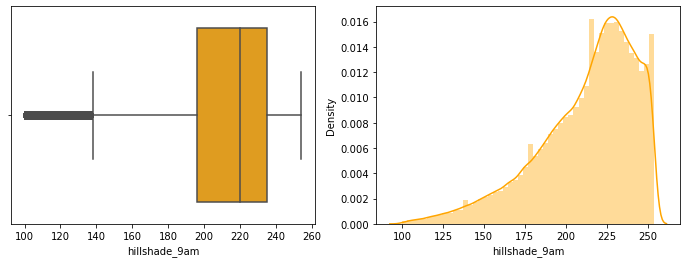

In [44]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
ax=axs.flat
sns.boxplot(df_ord["hillshade_9am"], ax=ax[0], color="orange")
sns.distplot(df_ord["hillshade_9am"], ax=ax[1], color="orange");

**some outliers of hillshade_noon column were dropped**

In [45]:
df_ord = df_ord[~(df_ord["hillshade_noon"]<100)]

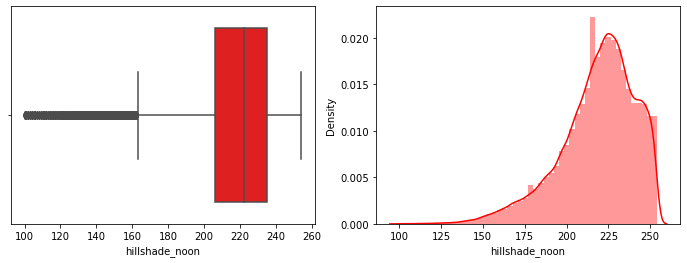

In [46]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
ax=axs.flat
sns.boxplot(df_ord["hillshade_noon"], ax=ax[0], color="red")
sns.distplot(df_ord["hillshade_noon"], ax=ax[1], color="red");

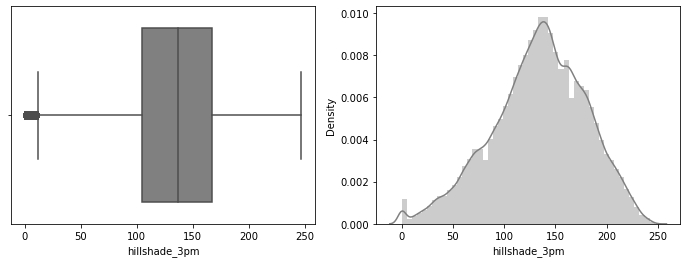

In [47]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
ax=axs.flat
sns.boxplot(df_ord["hillshade_3pm"], ax=ax[0], color="grey")
sns.distplot(df_ord["hillshade_3pm"], ax=ax[1], color="grey");

**some outliers of horizantal_distance_to_roadways column were dropped**

In [48]:
df_ord = df_ord[~(df_ord["horizontal_distance_to_fire_points"]>6000)]

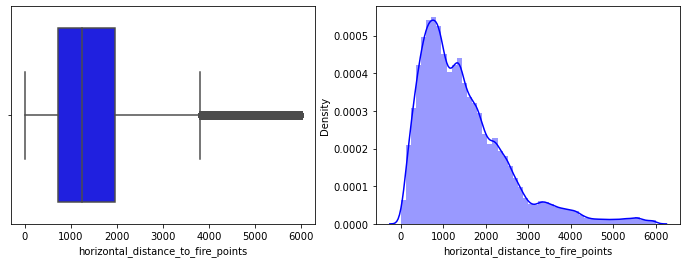

In [49]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
ax=axs.flat
sns.boxplot(df_ord["horizontal_distance_to_fire_points"], ax=ax[0], color="blue")
sns.distplot(df_ord["horizontal_distance_to_fire_points"], ax=ax[1], color="blue");

In [50]:
df_ord.shape

(244619, 13)

In [51]:
(250000-df_ord.shape[0])/250000*100

2.1524

%2.56 percentage of the data dropped to handle outliers.

<AxesSubplot:xlabel='cover_type', ylabel='count'>

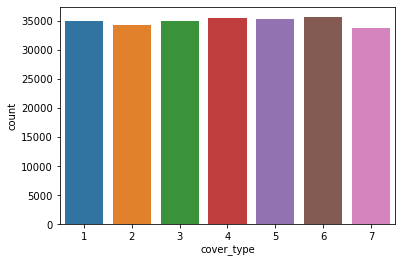

In [52]:
sns.countplot(df_ord["cover_type"])

### Now, let's take a closer look at correlation of continuous columns.

In [53]:
df_ord.iloc[:,:-3].corr()

elevation  aspect  slope  \
elevation                               1.000  -0.022 -0.318   
aspect                                 -0.022   1.000  0.029   
slope                                  -0.318   0.029  1.000   
horizontal_distance_to_hydrology        0.390   0.035 -0.048   
vertical_distance_to_hydrology          0.073   0.046  0.290   
horizontal_distance_to_roadways         0.580   0.045 -0.277   
hillshade_9am                           0.110  -0.608 -0.176   
hillshade_noon                          0.222   0.329 -0.609   
hillshade_3pm                           0.085   0.641 -0.343   
horizontal_distance_to_fire_points      0.472  -0.070 -0.241   

                                    horizontal_distance_to_hydrology  \
elevation                                                      0.390   
aspect                                                         0.035   
slope                                                         -0.048   
horizontal_distance_to_hydrology                               1.000   
vertical_distance_to_hydrology                                 0.616   
horizontal_distance_to_roadways                                0.157   
hillshade_9am                                                 -0.021   
hillshade_noon                                                 0.074   
hillshade_3pm                                                  0.066   
horizontal_distance_to_fire_points                             0.146   

                                    vertical_distance_to_hydrology  \
elevation                                                    0.073   
aspect                                                       0.046   
slope                                                        0.290   
horizontal_distance_to_hydrology                             0.616   
vertical_distance_to_hydrology                               1.000   
horizontal_distance_to_roadways                             -0.050   
hillshade_9am                                               -0.074   
hillshade_noon                                              -0.148   
hillshade_3pm                                               -0.065   
horizontal_distance_to_fire_points                          -0.050   

                                    horizontal_distance_to_roadways  \
elevation                                                     0.580   
aspect                                                        0.045   
slope                                                        -0.277   
horizontal_distance_to_hydrology                              0.157   
vertical_distance_to_hydrology                               -0.050   
horizontal_distance_to_roadways                               1.000   
hillshade_9am                                                 0.011   
hillshade_noon                                                0.241   
hillshade_3pm                                                 0.162   
horizontal_distance_to_fire_points                            0.483   

                                    hillshade_9am  hillshade_noon  \
elevation                                   0.110           0.222   
aspect                                     -0.608           0.329   
slope                                      -0.176          -0.609   
horizontal_distance_to_hydrology           -0.021           0.074   
vertical_distance_to_hydrology             -0.074          -0.148   
horizontal_distance_to_roadways             0.011           0.241   
hillshade_9am                               1.000          -0.031   
hillshade_noon                             -0.031           1.000   
hillshade_3pm                              -0.784           0.624   
horizontal_distance_to_fire_points          0.095           0.124   

                                    hillshade_3pm  \
elevation                                   0.085   
aspect                                      0.641   
slope                                      -0.343   
horizontal_di

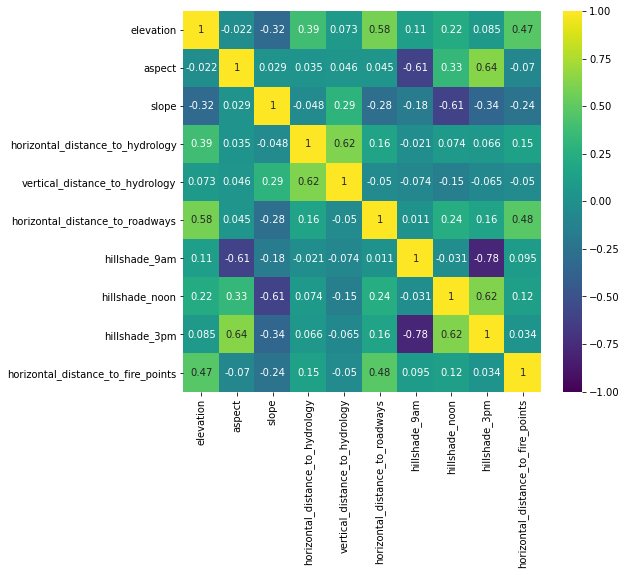

In [54]:
plt.figure(figsize=(8,7))
sns.heatmap(df_ord.iloc[:,:-3].corr(), vmin=-1,annot=True, cmap="viridis");

There is a high negative correlation between hillshade_9am and hillshade_3pm.

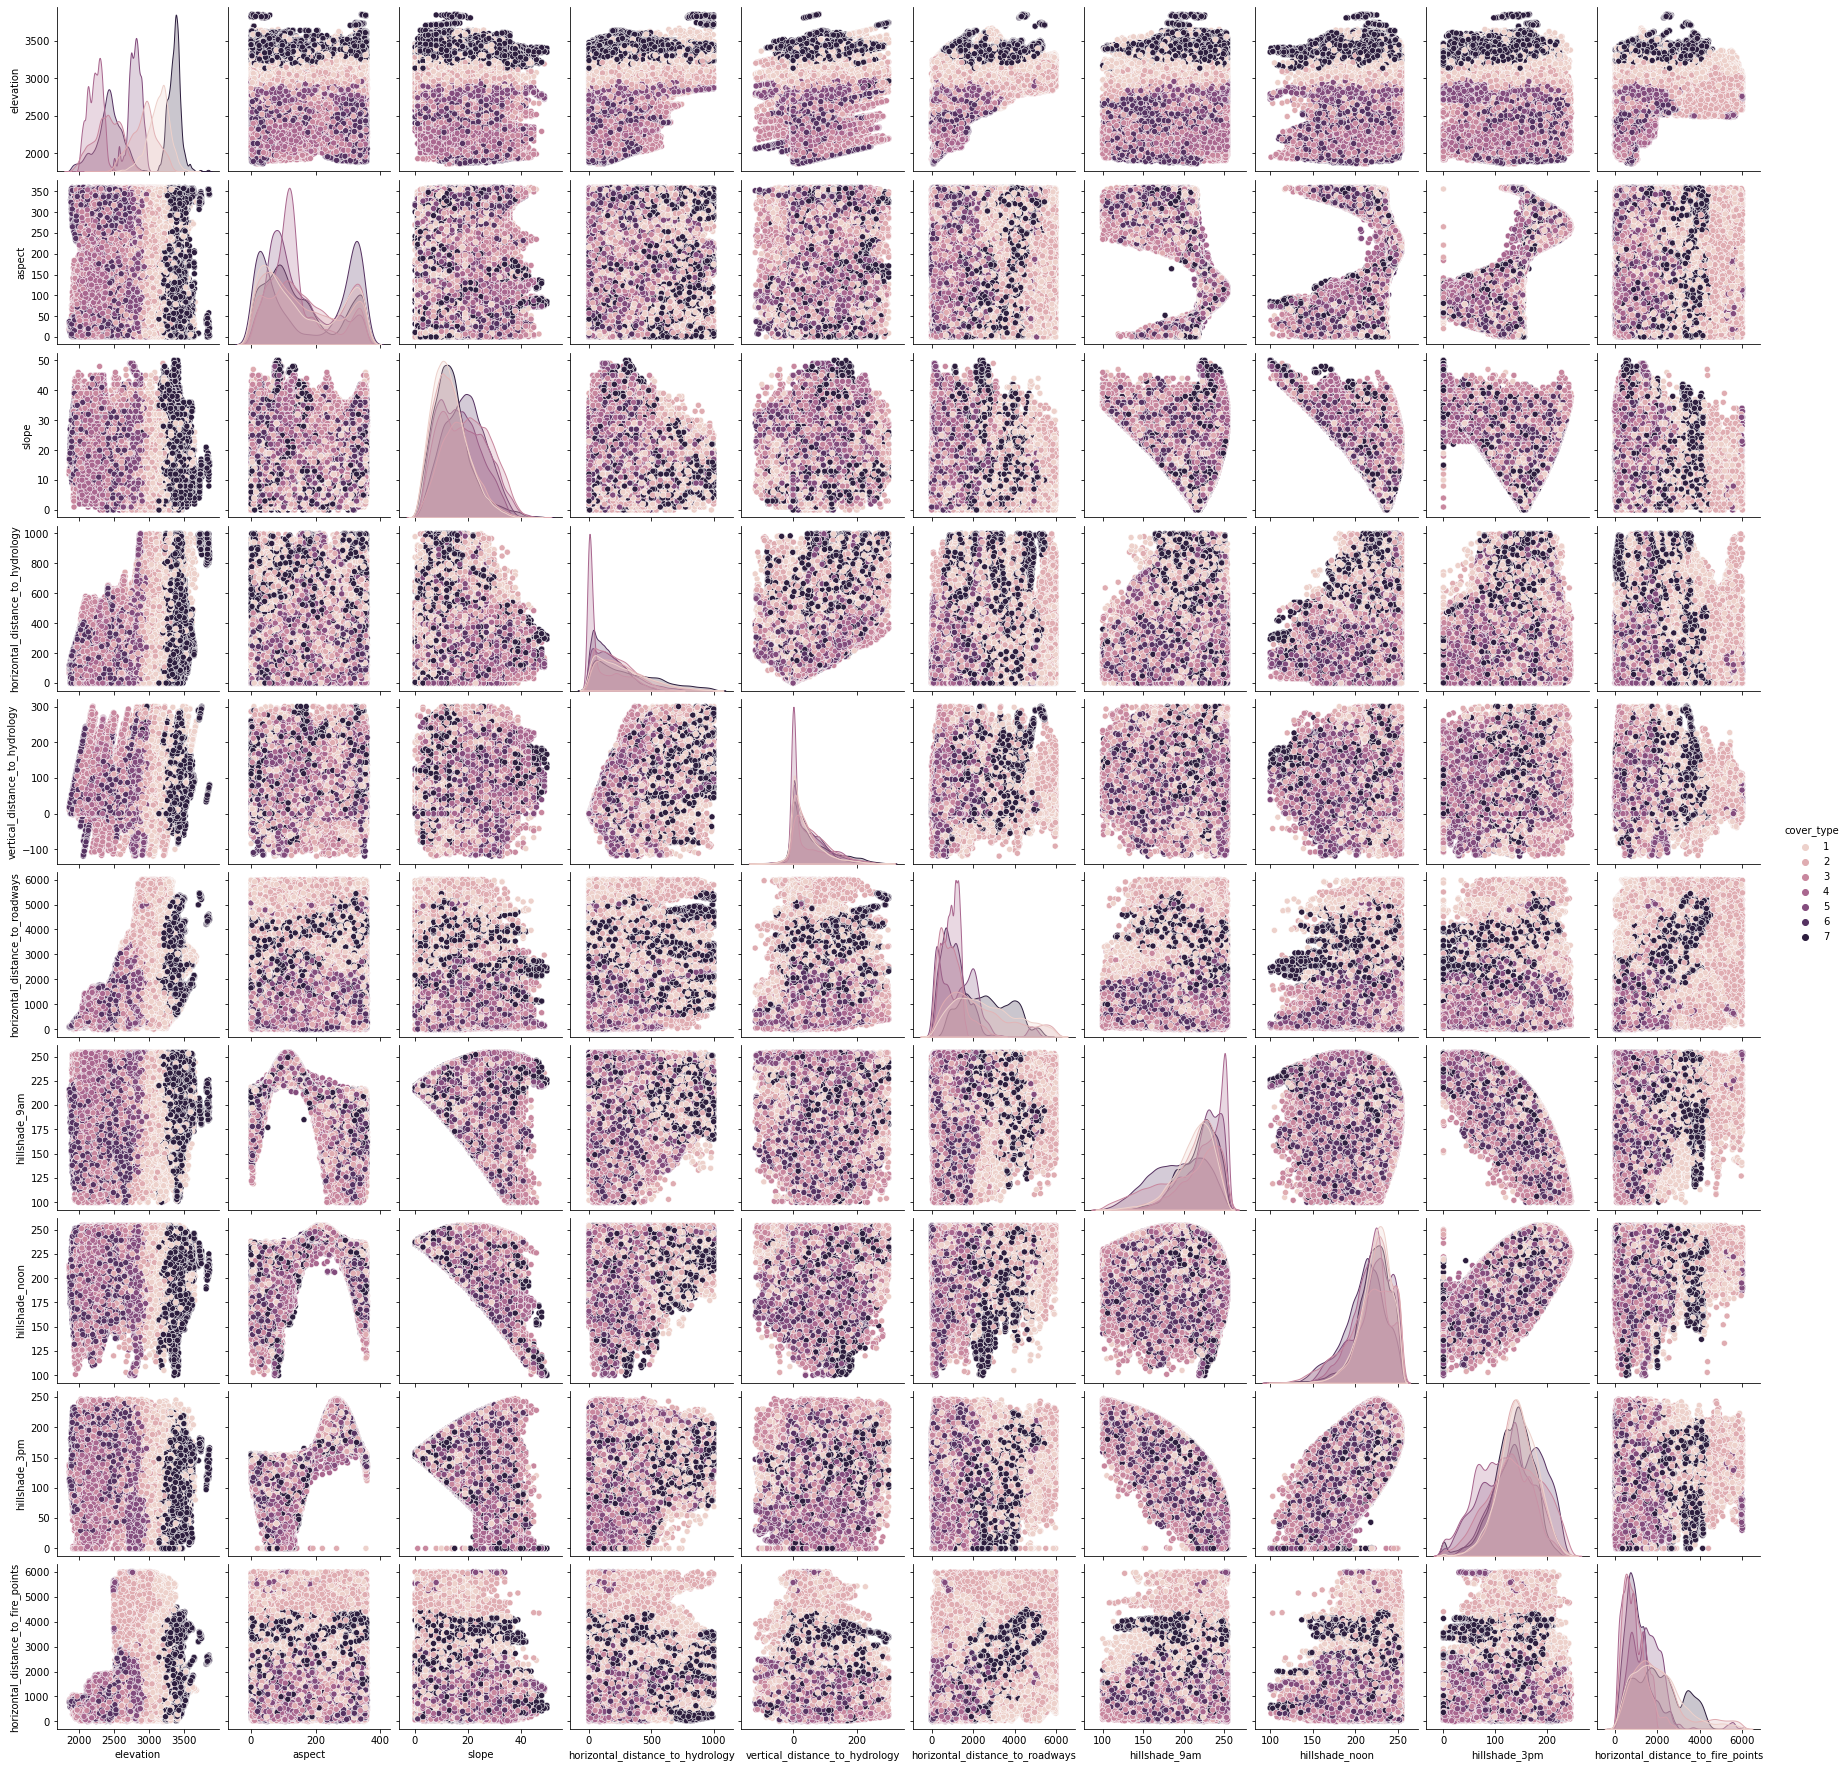

In [77]:
data = pd.concat([df_ord.iloc[:,:-3],df_ord["cover_type"]], axis=1)
sns.pairplot(data, hue="cover_type")

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [55]:
def hipo(c,d):
    
    hip = np.sqrt(c**2+d**2)
    return hip

In [56]:
df_ord["distance_to_hydrology"] = df.apply(lambda x: hipo(x.horizontal_distance_to_hydrology,x.horizontal_distance_to_hydrology), axis=1)

In [57]:
df_ord["average_horizantal_distance"] = (df_ord["horizontal_distance_to_hydrology"] + df_ord["horizontal_distance_to_roadways"])/2

In [58]:
df_ord["average_vertical_distance"] = (df_ord["vertical_distance_to_hydrology"] + df_ord["elevation"])/2

In [59]:
df_ord.drop(["horizontal_distance_to_hydrology", "vertical_distance_to_hydrology",
             "elevation","horizontal_distance_to_roadways"], axis=1, inplace=True)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [144]:
X = df_ord.drop("cover_type", axis=1)
y = df_ord["cover_type"]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [63]:
display(X_train.shape,X_test.shape)

(171233, 11)

(73386, 11)

In [64]:
def metric_df(model, X_train, y_train, X_test, y_test,name):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    scores = {name: {"accurancy" : accuracy_score(y_test,y_pred),                          
    "f1" : f1_score(y_test,y_pred)}
    return pd.DataFrame(scores)

In [142]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print("--------------------------------------")
    print("Confusion_matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print("classification_report")
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print("--------------------------------------")
    print("Confusion_matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print("classification_report")
    print(classification_report(y_train, y_train_pred))

In [65]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [80]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 7776  1490     4     0   340    41   876]
 [ 2124  6110   220     5  1360   397    62]
 [    0    12  7243   957   241  2031     0]
 [    0     0   228 10285     0   146     0]
 [   33   394   316     0  9654   232     0]
 [    0    65  1635   662   200  8130     0]
 [  505     5     0     0     6     0  9601]]
              precision    recall  f1-score   support

           1       0.74      0.74      0.74     10527
           2       0.76      0.59      0.67     10278
           3       0.75      0.69      0.72     10484
           4       0.86      0.96      0.91     10659
           5       0.82      0.91      0.86     10629
           6       0.74      0.76      0.75     10692
           7       0.91      0.95      0.93     10117

    accuracy                           0.80     73386
   macro avg       0.80      0.80      0.80     73386
weighted avg       0.80      0.80      0.80     73386


Train_Set
[[18138  3506    14     0   865    79  1960]
 [ 4864 14508   568   

In [ ]:
svm = metric_df(svm_model, X_train, y_train, X_test, y_test,SVM)

In [108]:
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style import set_palette
set_palette('set1')
#https://www.scikit-yb.org/en/latest/api/palettes.html

In [109]:
plot_confusion_matrix(svm_model, X_test_scaled, y_test)
plt.title("SVM Test Data Confusion Matrix");

NameError: name 'svm_model' is not defined

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(svm_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()

In [76]:
param_grid = {
    'base_estimator__C': np.linspace(0.01,1, 3),
}

model = BaggingClassifier(SVC(kernel="linear"), n_jobs=-1, max_samples=.1,n_estimators=5,random_state=6)
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="f1_macro",
                              n_jobs=-1)

svm_model_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                         max_samples=0.1, n_estimators=5,
                                         n_jobs=-1, random_state=6),
             n_jobs=-1,
             param_grid={'base_estimator__C': array([0.01 , 0.505, 1.   ])},
             scoring='f1_macro', verbose=2)

In [77]:
svm_model_grid.best_params_

{'base_estimator__C': 1.0}

In [78]:
svm_model_grid.best_estimator_

BaggingClassifier(base_estimator=SVC(kernel='linear'), max_samples=0.1,
                  n_estimators=5, n_jobs=-1, random_state=6)

In [79]:
eval_metric(svm_model_grid, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[6586 1603    3    0  552   74 1709]
 [2452 4469  210   13 2517  449  168]
 [   0    9 4986 1949  357 3183    0]
 [   0    0  434 9910    0  315    0]
 [  47 1241  327    0 8672  342    0]
 [   0  127 1862 1218  388 7097    0]
 [ 988    9    0    0   35    0 9085]]
              precision    recall  f1-score   support

           1       0.65      0.63      0.64     10527
           2       0.60      0.43      0.50     10278
           3       0.64      0.48      0.54     10484
           4       0.76      0.93      0.83     10659
           5       0.69      0.82      0.75     10629
           6       0.62      0.66      0.64     10692
           7       0.83      0.90      0.86     10117

    accuracy                           0.69     73386
   macro avg       0.68      0.69      0.68     73386
weighted avg       0.68      0.69      0.68     73386


Train_Set
[[15522  3703    14     0  1318   177  3828]
 [ 5817 10406   519    31  5880   982   346]
 [    0    24 11480  4447 

In [110]:
plot_confusion_matrix(svm_model_grid, X_test_scaled, y_test)
plt.title("SVM Grid Test Data Confusion Matrix");

NameError: name 'svm_model_grid' is not defined

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()

**SVM model applied to the data. Without any parameters the accurancy of model is 0.80. In grid model since the model restricted by max_samples, the accurancy of grid model decreased to 0.69**

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [68]:
model_tree = DecisionTreeClassifier()

model_tree.fit(X_train , y_train)

DecisionTreeClassifier()

In [69]:
eval_metric(model_tree, X_train, y_train, X_test, y_test)

Test_Set
[[ 8824  1355     2     0    70    17   259]
 [ 1504  8095   177     0   318   158    26]
 [    5   139  9678   131    38   493     0]
 [    0     0    84 10529     0    46     0]
 [   36   160    31     0 10382    20     0]
 [    8   104   463    68    29 10020     0]
 [  154    17     0     0     3     0  9943]]
              precision    recall  f1-score   support

           1       0.84      0.84      0.84     10527
           2       0.82      0.79      0.80     10278
           3       0.93      0.92      0.93     10484
           4       0.98      0.99      0.98     10659
           5       0.96      0.98      0.97     10629
           6       0.93      0.94      0.93     10692
           7       0.97      0.98      0.98     10117

    accuracy                           0.92     73386
   macro avg       0.92      0.92      0.92     73386
weighted avg       0.92      0.92      0.92     73386


Train_Set
[[24562     0     0     0     0     0     0]
 [    0 23981     0   

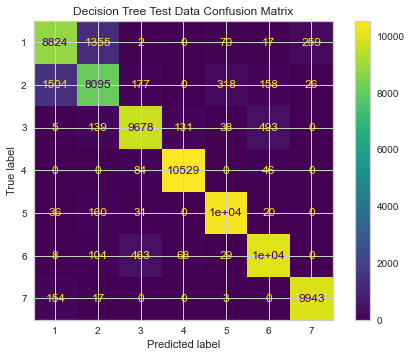

In [148]:
plot_confusion_matrix(model_tree, X_test, y_test)
plt.title("Decision Tree Test Data Confusion Matrix");

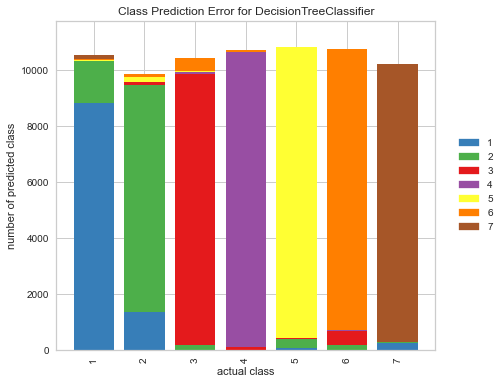

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [147]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(model_tree)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

**Decision tree model fitted train set % 100 which means that there is an overfitting in the model. Accurancy result of test data set 0.92. This result is better than SVM.**

In [93]:
model_t = DecisionTreeClassifier(random_state=101)

param_grid = {'criterion': ["gini","entropy"],
              "splitter":["best", "random"],
              "max_depth": [20],
              "min_samples_leaf": [1,2],
              "min_samples_split": [1,2,3]}
             

model_grid_tree = GridSearchCV(estimator=model_t,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)
model_grid_tree.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [94]:
model_grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [95]:
eval_metric(model_grid_tree, X_train, y_train, X_test, y_test)

Test_Set
[[ 8845  1351     4     0    79    12   236]
 [ 1537  8077   128     2   359   150    25]
 [    0   116  9545   119    47   657     0]
 [    0     0    78 10539     0    42     0]
 [   14   142    29     0 10427    17     0]
 [   10    87   490    75    19 10011     0]
 [  124     8     0     0     5     0  9980]]
              precision    recall  f1-score   support

           1       0.84      0.84      0.84     10527
           2       0.83      0.79      0.81     10278
           3       0.93      0.91      0.92     10484
           4       0.98      0.99      0.99     10659
           5       0.95      0.98      0.97     10629
           6       0.92      0.94      0.93     10692
           7       0.97      0.99      0.98     10117

    accuracy                           0.92     73386
   macro avg       0.92      0.92      0.92     73386
weighted avg       0.92      0.92      0.92     73386


Train_Set
[[23874   577     0     0    53     0    58]
 [  815 22843    13   

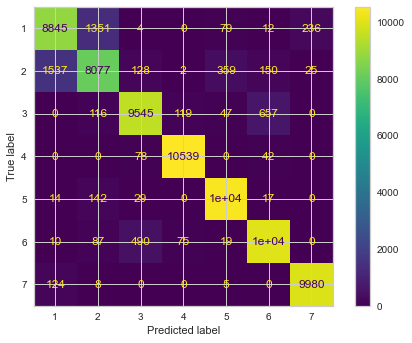

In [131]:
plot_confusion_matrix(model_grid_tree, X_test, y_test);

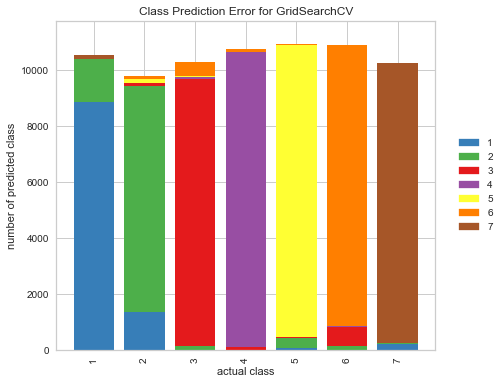

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [132]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(model_grid_tree)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

**Decision tree accurancy score is 0.92 which is higher than SVM. To handle overfitting, max depth was choosen 20. The accurancy result of this model is also 0.92. But the accurancy result of train model is 0.98. If we choose maxdepth 17, the accurancies of test and train are 0.90 and 0.95 respectively. The optimal value of maximal depth in grid seach is about 35. In this case, accurancy of test data is 0.93 but train is 1.00, that is, model overfitted.**

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [101]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
eval_metric(rfc, X_train, y_train, X_test, y_test)

Test_Set
[[ 9464   831     1     0    44    15   172]
 [  920  8847   144     0   198   151    18]
 [    0    11 10122    81    11   259     0]
 [    0     0    20 10637     0     2     0]
 [    0    28    19     0 10572    10     0]
 [    0    16   154    69     5 10448     0]
 [   41     1     0     0     4     0 10071]]
              precision    recall  f1-score   support

           1       0.91      0.90      0.90     10527
           2       0.91      0.86      0.88     10278
           3       0.97      0.97      0.97     10484
           4       0.99      1.00      0.99     10659
           5       0.98      0.99      0.99     10629
           6       0.96      0.98      0.97     10692
           7       0.98      1.00      0.99     10117

    accuracy                           0.96     73386
   macro avg       0.96      0.96      0.96     73386
weighted avg       0.96      0.96      0.96     73386


Train_Set
[[24562     0     0     0     0     0     0]
 [    0 23981     0   

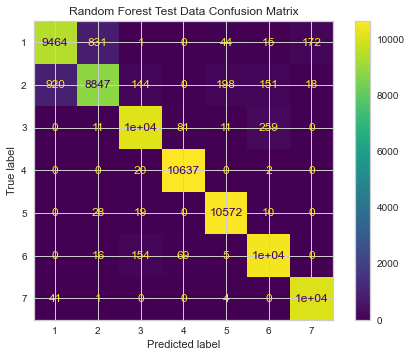

In [134]:
plot_confusion_matrix(rfc, X_test, y_test)
plt.title("Random Forest Test Data Confusion Matrix");

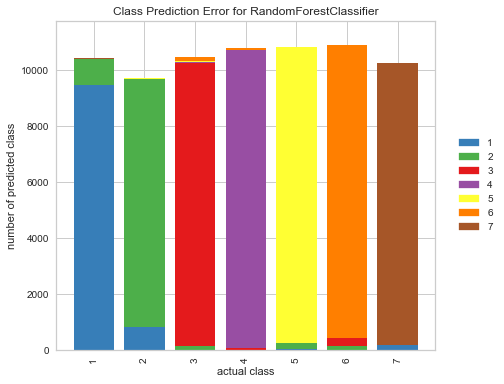

In [137]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

In [103]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[15,18,21],
             'min_samples_split':[2,6,10],
             }

In [105]:
rfc_model = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 18, 21],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [30, 100, 200]},
             scoring='accuracy', verbose=2)

In [106]:
rfc_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'min_samples_split': 2,
 'n_estimators': 200}

In [107]:
eval_metric(rfc_grid, X_train, y_train, X_test, y_test)

Test_Set
[[ 9437   844     4     0    56    12   174]
 [  912  8843   144     0   213   153    13]
 [    0    10 10010    86    14   364     0]
 [    0     0    20 10637     0     2     0]
 [    0    20    17     0 10584     8     0]
 [    0    15   147    64     3 10463     0]
 [   42     1     0     0     4     0 10070]]
              precision    recall  f1-score   support

           1       0.91      0.90      0.90     10527
           2       0.91      0.86      0.88     10278
           3       0.97      0.95      0.96     10484
           4       0.99      1.00      0.99     10659
           5       0.97      1.00      0.98     10629
           6       0.95      0.98      0.96     10692
           7       0.98      1.00      0.99     10117

    accuracy                           0.95     73386
   macro avg       0.95      0.95      0.95     73386
weighted avg       0.95      0.95      0.95     73386


Train_Set
[[24538    16     0     0     5     0     3]
 [    7 23933     1   

**Random forest accurancy score is 0.96 which is higher than SVM and decision tree. To handle overfitting, grid search applied with maxdepth 15,18,21 and some other hyper parameters. The accurancy result of this model is also 0.95. But the accurancy result of train model is 1.0. Maxdepth can be decreased to handle overfittig but since score is very high it is not needed.**

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [119]:
import time
start_time = time.time()
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)
print('Fit time : ', time.time() - start_time)

Fit time :  78.3334801197052


In [123]:
eval_metric(xgb_classifier, X_train, y_train, X_test, y_test)

Test_Set
[[ 8739  1304     2     0   131    13   338]
 [ 1565  7761   210     0   503   200    39]
 [    0    18  9346   156    63   901     0]
 [    0     0    44 10596     0    19     0]
 [    4    57    46     0 10494    28     0]
 [    3    28   489    88    28 10056     0]
 [  103     3     0     0     4     0 10007]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83     10527
           1       0.85      0.76      0.80     10278
           2       0.92      0.89      0.91     10484
           3       0.98      0.99      0.99     10659
           4       0.94      0.99      0.96     10629
           5       0.90      0.94      0.92     10692
           6       0.96      0.99      0.98     10117

    accuracy                           0.91     73386
   macro avg       0.91      0.91      0.91     73386
weighted avg       0.91      0.91      0.91     73386


Train_Set
[[21336  2437     2     0   242    14   531]
 [ 3096 19231   384   

In [ ]:
param_grid = {"n_estimators":[100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2]}
xgb_model = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

In [ ]:
xgb_grid.best_params_

In [ ]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

### The best model for this data is Random Forest with the accurancy 0.96

In [ ]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [SVM_accuracy_test, rfc_accuracy_test, xgb_accuracy_test, modelTree_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14)

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___